# Alpine3D Anatomy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from palettable.colorbrewer.diverging import *
from palettable.colorbrewer.sequential import *
from calendar import monthrange

In [2]:
def calc_rho(vol_frac_ice, vol_frac_air):
    rho = 917 * vol_frac_ice + 1.1 * vol_frac_air
    return rho

# Figure: Density profile

In [3]:
path = "/pl/active/nasa_smb/SNOWPACK_WAIS/input/snofiles/thwaites_1.sno"
thickness, vol_frac_ice, vol_frac_air, rg, rb, sp = np.loadtxt(path, skiprows=35, usecols=[1, 3, 5, 10, 11, 13], unpack=True)
rho = calc_rho(vol_frac_ice, vol_frac_air)
depth = np.flip(np.cumsum(np.flip(thickness)))

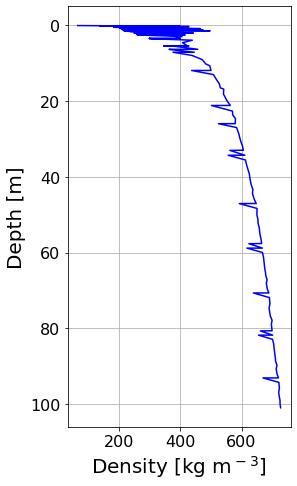

In [4]:
plt.figure(figsize=(4, 8))
plt.plot(rho, depth, 'b')
# plt.ylim([0, 10])
plt.gca().invert_yaxis()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel("Depth [m]", fontsize = 20)
plt.xlabel("Density [kg m$^-$$^3$]", fontsize = 20)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("demo_rho_profile.pdf", format='pdf', dpi=25, bbox_inches='tight')

# Figure: Erosion and Deposition

In [5]:
path = "/scratch/summit/jiko1138/2015_WN/output/grids/a3d_grids_2015.nc"
ds = xr.open_dataset(path)
n_trim = 15 # 15
ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))
erosion_deposition = ds['WINDEROSIONDEPOSITION'].sum(dim='time')

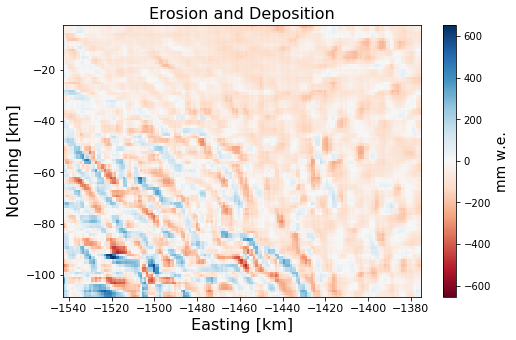

In [6]:
colormap = RdBu_11.mpl_colormap
plt.figure(figsize=(8, 5))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, erosion_deposition, \
           vmin=-np.abs(erosion_deposition.values).max(), vmax=np.abs(erosion_deposition.values).max(), cmap=colormap, linewidth=0, rasterized=True)
cb = plt.colorbar()
cb.set_label("mm w.e.", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("Erosion and Deposition", fontsize=16)
plt.savefig("deposition_erosion.pdf", format='pdf', dpi=25, bbox_inches='tight')

# Topography

In [7]:
n_trim = 15
ds = xr.open_dataset("/scratch/summit/jiko1138/2015_WN/output/grids/a3d_grids_2015.nc")

# Load data sets
dem_high_res = np.flipud(np.loadtxt("/scratch/summit/jiko1138/SNOWPACK_WAIS/input/surface-grids/dem.asc", skiprows=6))

dem_high_res = xr.DataArray(dem_high_res, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])
dem_high_res = dem_high_res.isel(easting=slice(n_trim, -n_trim))
dem_high_res = dem_high_res.isel(northing=slice(n_trim, -n_trim))

ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))

colormap=YlGnBu_9.mpl_colormap


# Figure: ICESat-2 Topography

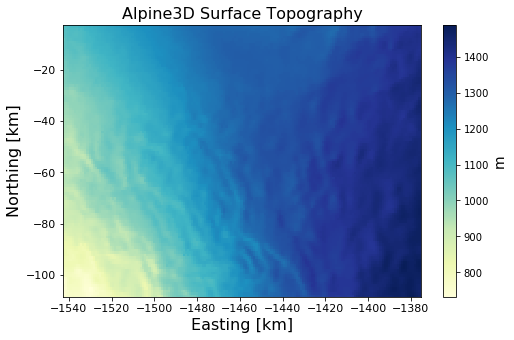

In [9]:
plt.figure(figsize=(8, 5))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, dem_high_res, cmap=colormap, linewidth=0, rasterized=True)
cb = plt.colorbar()
cb.set_label("m", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("ICESat-2 Surface Topography", fontsize=16)
plt.title("Alpine3D Surface Topography", fontsize=16)
plt.savefig("IC2_topo.pdf", format='pdf', dpi=25, bbox_inches='tight')

# Figure: MERRA-2 Topography
```bash
gdalwarp -s_srs EPSG:4326 -t_srs EPSG:3031 NETCDF:Elevation_MERRA2.nc:PHIS EPSG_3031_Elevation_MERRA2.tif
gdal_translate -of NetCDF EPSG_3031_Elevation_MERRA2.tif EPSG_3031_Elevation_MERRA2.nc
```

In [10]:
dem_low_res = xr.open_dataset("EPSG_3031_Elevation_MERRA2.nc")
dem_low_res = dem_low_res['PHIS']

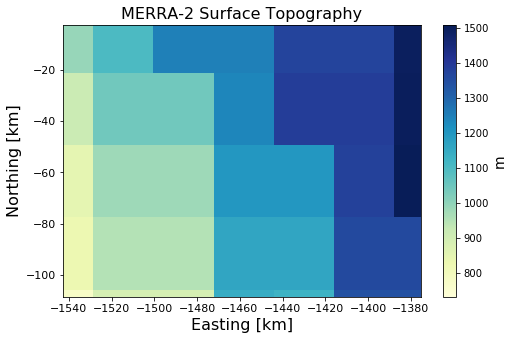

In [11]:
plt.figure(figsize=(8, 5))
plt.pcolor(dem_low_res['x']/1000, dem_low_res['y']/1000, dem_low_res[0,:,:], vmin=minima, vmax=maxima, cmap=colormap)
cb = plt.colorbar()
cb.set_label("m", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("MERRA-2 Surface Topography", fontsize=16)
plt.xlim([dem_high_res['easting'].min()/1000, dem_high_res['easting'].max()/1000])
plt.ylim([dem_high_res['northing'].min()/1000, dem_high_res['northing'].max()/1000])
plt.savefig("M2_topo.pdf", format='pdf', dpi=25, bbox_inches='tight')

# Figure: Wind Speed

In [12]:
path = "/scratch/summit/jiko1138/2015_WN/output/grids/a3d_grids_2015.nc"
ds = xr.open_dataset(path)
n_trim = 15 # 15
ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))
ws = ds['ws'].mean(dim='time')
# ws = ds['ws'][4000,:,:]

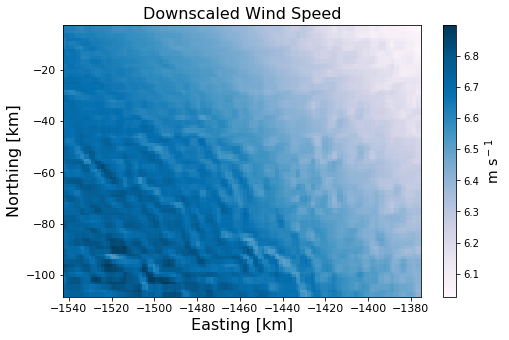

In [13]:
colormap = PuBu_9.mpl_colormap
plt.figure(figsize=(8, 5))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, ws, cmap=colormap, linewidth=0, rasterized=True)
cb = plt.colorbar()
cb.set_label("m s$^-$$^1$", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("Downscaled Wind Speed", fontsize=16)
plt.savefig("wind_speed.pdf", format='pdf', dpi=25, bbox_inches='tight')

# Figure: MERRA-2 Winds

In [24]:
# u = xr.open_dataset("/scratch/summit/jiko1138/MERRA2_monthly/U10M_monthly_2015.nc")
# v = xr.open_dataset("/scratch/summit/jiko1138/MERRA2_monthly/V10M_monthly_2015.nc")
# u = u.mean(dim='month')
# v = v.mean(dim='month')
u = xr.open_dataset("/scratch/summit/jiko1138/MERRA2/U10M_hourly_2015.nc")
v = xr.open_dataset("/scratch/summit/jiko1138/MERRA2/V10M_hourly_2015.nc")
# u = u['U10M'][1000,:,:]
# v = v['V10M'][1000,:,:]

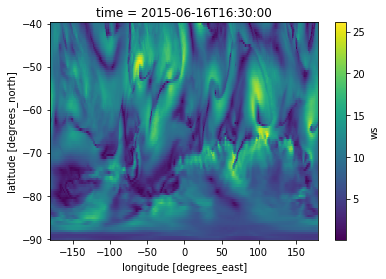

In [25]:
ws_M2 = xr.ufuncs.sqrt(xr.ufuncs.square(u['U10M'][4000,:,:]) + xr.ufuncs.square(v['V10M'][4000,:,:]))
ws_M2['ws'] = ws_M2
ws_M2['ws'].plot()
ws_M2.to_netcdf("ws_mean_1980.nc")

In [26]:
%%bash
ml intel; ml proj; ml gdal
gdalwarp -s_srs EPSG:4326 -t_srs EPSG:3031 NETCDF:ws_mean_1980.nc:ws EPSG_3031_ws_MERRA2.tif
gdal_translate -of NetCDF EPSG_3031_ws_MERRA2.tif EPSG_3031_ws_MERRA2.nc

Processing input file NETCDF:ws_mean_1980.nc:ws.
Using internal nodata values (e.g. nan) for image NETCDF:ws_mean_1980.nc:ws.
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 414, 414
0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: No UNIDATA NC_GLOBAL:Conventions attribute


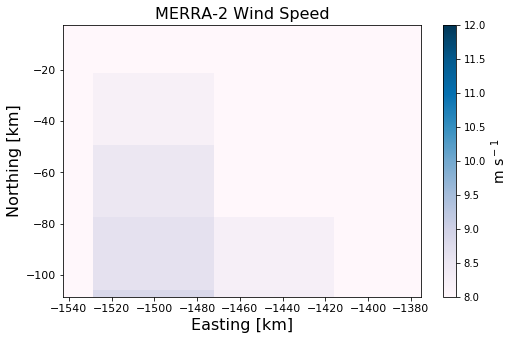

In [27]:
ds = xr.open_dataset("EPSG_3031_ws_MERRA2.nc")
colormap = PuBu_9.mpl_colormap
plt.figure(figsize=(8, 5))
# plt.pcolor(ds['x']/1000, ds['y']/1000, ds['ws'], vmin=float(ws.min().values), vmax=float(ws.max().values), cmap=colormap)
plt.pcolor(ds['x']/1000, ds['y']/1000, ds['ws'], vmin=8, vmax=12, cmap=colormap)
# plt.pcolor(ds['x']/1000, ds['y']/1000, ds['ws'], cmap=colormap)

cb = plt.colorbar()
cb.set_label("m s$^-$$^1$", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("MERRA-2 Wind Speed", fontsize=16)
plt.xlim([dem_high_res['easting'].min()/1000, dem_high_res['easting'].max()/1000])
plt.ylim([dem_high_res['northing'].min()/1000, dem_high_res['northing'].max()/1000])
plt.savefig("M2_wind_speed.pdf", format='pdf', dpi=25, bbox_inches='tight')

# MERRA-2 SMB

In [ ]:
path = "/scratch/summit/jiko1138/nc_storage/pomeroy.nc"
ds = xr.open_dataset(path)
n_trim = 15 # 15
ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))
dswe = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0)
dswe = dswe * 1000

In [ ]:
colormap = PuBu_9.mpl_colormap
plt.figure(figsize=(8, 5))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, dswe, cmap=colormap, linewidth=0, rasterized=True, vmin=0, vmax=dswe.values.max())
cb = plt.colorbar()
cb.set_label("mm w.e.", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("Alpine3D Surface Mass Balance", fontsize=16)
plt.savefig("wind_speed.pdf", format='pdf', dpi=25, bbox_inches='tight')

In [ ]:
# Calculate seconds in each month from 1980 - 2020
seconds = np.zeros(12); seconds[:] = np.nan
count = -1
for year in range(1980, 1980 + 1):
    for month in range(1, 12 + 1):
        count = count + 1
        tmp = monthrange(year, month)
        seconds[count] = float(tmp[1]) * 24 * 60 * 60

# Path
data_path = "/scratch/summit/jiko1138/MERRA2_monthly/"

# Precipitation
sn = xr.open_mfdataset(data_path + "PRECSN_monthly_1980.nc", concat_dim="time")
ls = xr.open_mfdataset(data_path + "PRECLS_monthly_1980.nc", concat_dim="time")
cu = xr.open_mfdataset(data_path + "PRECCU_monthly_1980.nc", concat_dim="time")

# Evaporation 
evap = xr.open_mfdataset(data_path + "EVAP_monthly_1980.nc", concat_dim="time")

# SMB
M2_smb = sn['PRECSN'] + ls['PRECLS'] + cu['PRECCU'] - evap['EVAP']
M2_smb = M2_smb.mean(dim='time').mean(dim='month') * seconds.mean() * 12
M2_smb['smb'] = M2_smb
M2_smb.to_netcdf("M2_smb.nc")

In [ ]:
%%bash
ml intel; ml proj; ml gdal
gdalwarp -s_srs EPSG:4326 -t_srs EPSG:3031 NETCDF:M2_smb.nc:smb EPSG_3031_M2_smb.tif
gdal_translate -of NetCDF EPSG_3031_M2_smb.tif EPSG_3031_smb_MERRA2.nc

In [ ]:
ds = xr.open_dataset("EPSG_3031_smb_MERRA2.nc")
colormap = PuBu_9.mpl_colormap
plt.figure(figsize=(8, 5))
# plt.pcolor(ds['x']/1000, ds['y']/1000, ds['ws'], vmin=float(ws.min().values), vmax=float(ws.max().values), cmap=colormap)
plt.pcolor(ds['x']/1000, ds['y']/1000, ds['smb'], vmin=0, vmax=dswe.values.max(), cmap=colormap)

cb = plt.colorbar()
cb.set_label("mm w.e.", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Easting [km]", fontsize=16)
plt.ylabel("Northing [km]", fontsize=16)
plt.title("MERRA-2 Surface Mass Balance", fontsize=16)
plt.xlim([dem_high_res['easting'].min()/1000, dem_high_res['easting'].max()/1000])
plt.ylim([dem_high_res['northing'].min()/1000, dem_high_res['northing'].max()/1000])
plt.savefig("M2_wind_speed.pdf", format='pdf', dpi=25, bbox_inches='tight')